# Statistic & probability computer homework 1



## Import packages



In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

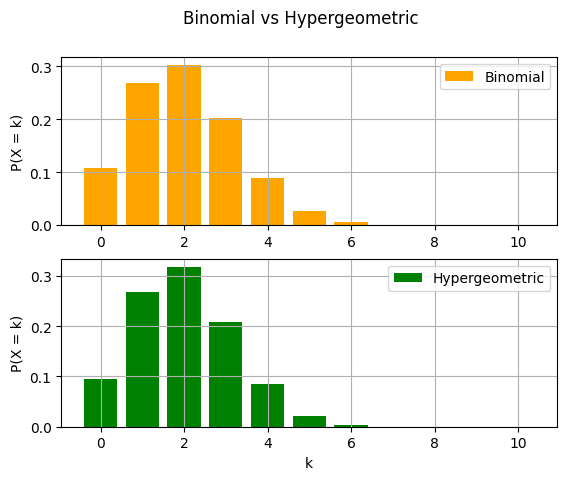

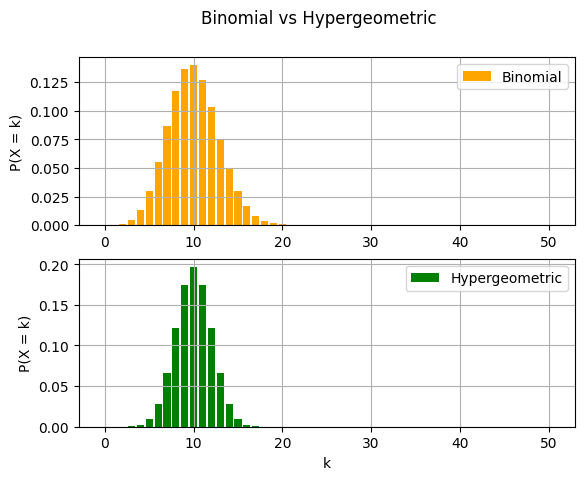

In [2]:
def combination(n, r):
    if n < r:
        return 0
    return np.math.factorial(n) // (np.math.factorial(r) * np.math.factorial(n - r))


def binomial(n, k, p):
    return combination(n, k) * p**k * (1 - p)**(n - k)


def hyper_geometric(n, k, N, M):
    assert n <= N, 'n must be less than or equal to N'
    assert M <= N, 'M must be less than or equal to N'
    assert k <= n, 'k must be less than or equal to n'
    return combination(M, k) * combination(N - M, n - k) / combination(N, n)


def plot(experiments):
    N = 100
    M = 20
    success_probability = M / N # p
    successes = np.arange(0, experiments + 1) # k = 0, 1, ..., n

    binomial_distribution = [binomial(experiments, k, success_probability) for k in successes]
    hyper_geometric_distribution = [hyper_geometric(experiments, k, N, M) for k in successes]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle('Binomial vs Hypergeometric')
    ax1.bar(successes, binomial_distribution, label='Binomial', color='orange')
    ax2.bar(successes, hyper_geometric_distribution, label='Hypergeometric', color='green')

    ax1.legend()
    ax2.legend()
    ax1.set_ylabel('P(X = k)')
    ax2.set_ylabel('P(X = k)')
    ax2.set_xlabel('k')
    ax1.grid(True)
    ax2.grid(True)


plot(10)
plot(50)


## Question 2

### Pre process on file

In [3]:
with open('Text-1.txt', 'r') as f:
    content = f.read()
    content = re.sub(r'[^\da-zA-Z]+', ' ', content)

with open('preprocessed.txt', 'w') as f:
    f.write(content)

words = content.split()

### Analysis

In [4]:
target_words = ['the', 'eye', 'of', 'existence', 'hair', 'and', 'nature', 'mouth', 'head', 'darwin', 'size', 'touch', 'second', 'conclusion', 'revolution', 'muscles', 'necessity', 'public', 'body', 'within', 'to', 'in', 'distribution', 'words']
df = pd.DataFrame({'words': target_words, 'frequency': [words.count(i) for i in target_words]})
sorted_table = df.sort_values(by=['frequency'], ascending=False)
sorted_table['rank'] = np.arange(1, len(sorted_table) + 1)
print(sorted_table)

           words  frequency  rank
0            the      10431     1
2             of       7818     2
5            and       4498     3
21            in       3890     4
20            to       3693     5
6         nature        246     6
19        within        105     7
3      existence         66     8
10          size         66     9
22  distribution         53    10
18          body         52    11
8           head         40    12
1            eye         31    13
12        second         26    14
13    conclusion         26    15
7          mouth         23    16
4           hair         11    17
23         words          9    18
16     necessity          6    19
15       muscles          4    20
14    revolution          3    21
11         touch          3    22
17        public          0    23
9         darwin          0    24


### Plot

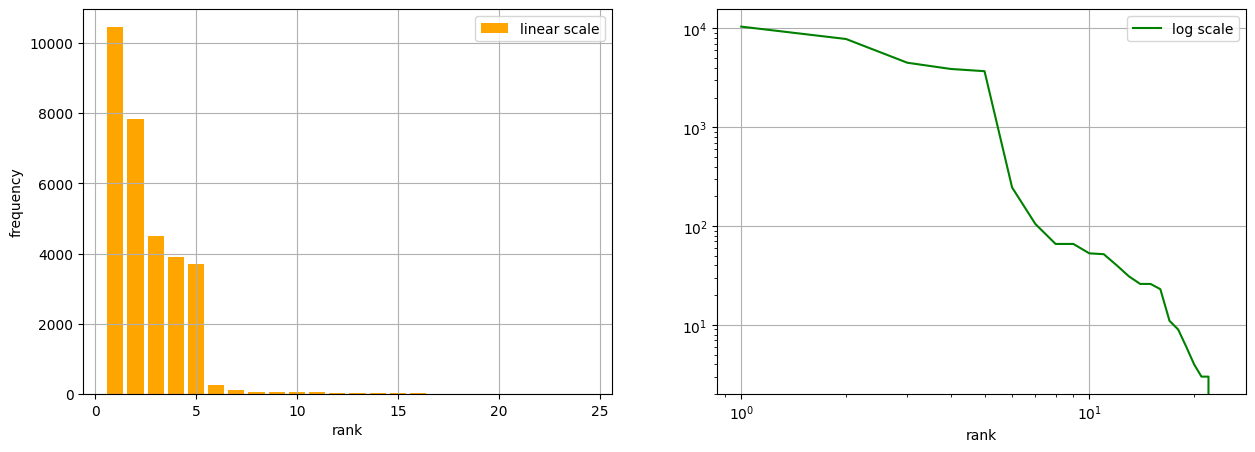

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(sorted_table['rank'], sorted_table['frequency'], label='linear scale', color='orange')
ax2.loglog(sorted_table['rank'], sorted_table['frequency'], label='log scale', color='green')

ax1.legend()
ax2.legend()
ax1.set_ylabel('frequency')
ax1.set_xlabel('rank')
ax2.set_xlabel('rank')
ax1.grid(True)
ax2.grid(True)

# Question 3

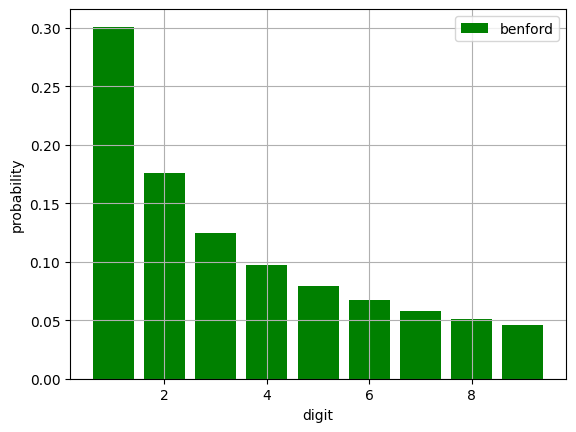

In [6]:
def benford(n):
    return np.log10(1 + 1 / n)


digits = list(range(1, 9 + 1))
benford_distribution = [benford(i) for i in digits]

fig, ax = plt.subplots(1,1)
ax.bar(digits, benford_distribution, label='benford', color='green')
ax.legend()
ax.set_ylabel('probability')
ax.set_xlabel('digit')
ax.grid(True)